In [1]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [2]:
def ring_resonator(wavelengths, ring_type, radius, coupling_length, kappa, tau, n_eff, ng, losses):
    lambdas = np.array(wavelengths) 
    alpha = -np.log10(10 ** (-losses / 10)) # Losses in cm^-1
    real_length = 2 * coupling_length + 2 * np.pi * radius
    phi_rt = (2 * np.pi / lambdas) * n_eff * real_length # Calculate the acumulative phase
    A = np.exp(-alpha * 100 * real_length) # Phase factor

    if ring_type == 'All-pass':

        E_thru = (-np.sqrt(A) + tau * np.exp(-1j * phi_rt)) / (-np.sqrt(A) * np.conjugate(tau) + 
                                                               np.exp(-1j * phi_rt)) # Field at thru port
        
        E_drop = np.zeros(len(lambdas)) # Field at drop port
        
        peaks = find_peaks(-(abs(E_thru) ** 2))[0] # Find resonances indices
        
        resonant_wavelengths = np.array(list(map(lambda res: lambdas[res], peaks))) # Resonances
        
        FWHM = ((1 - (tau ** 2) * np.sqrt(A)) * resonant_wavelengths ** 2) / (
                np.pi * ng * real_length * np.sqrt(tau ** 2 * np.sqrt(A))) # Calculate the FWHM of each resonance
        
        Q_Factor = [resonant_wavelengths[i] / FWHM[i] for i in range(len(resonant_wavelengths))] #  Calculate the Q-Factor of each resonance
        
        FSR = resonant_wavelengths[0] / (ng * real_length) # Calculate the FSR

        results = {
            'E_thru': E_thru,
            'E_drop': E_drop,
            'resonances': resonant_wavelengths,
            'Q-Factor': Q_Factor,
            'FSR': FSR
        }

        return results

    elif ring_type == 'Add-drop':

        E_thru = (tau - np.conjugate(tau) * np.sqrt(A) * np.exp(1j * phi_rt)) / (
                1 - np.sqrt(A) * (np.conjugate(tau) ** 2) * np.exp(1j * phi_rt)) # Field at thru port
        
        E_drop = (-np.conjugate(kappa) * kappa * np.sqrt(np.sqrt(A) * np.exp(1j * phi_rt))) / (
                1 - np.sqrt(A) * (np.conjugate(tau)) ** 2 * np.exp(1j * phi_rt)) # Field at drop port
        
        peaks = find_peaks(-(abs(E_thru) ** 2))[0] # Find resonances indices
        
        resonant_wavelengths = np.array(list(map(lambda res: lambdas[res], peaks))) # Resonances
        
        FWHM = ((1 - (tau ** 2) * np.sqrt(A)) * resonant_wavelengths ** 2) / (
                np.pi * ng * real_length * np.sqrt(tau ** 2 * np.sqrt(A))) # Calculate the FWHM of each resonance
        
        Q_Factor = [resonant_wavelengths[i] / FWHM[i] for i in range(len(resonant_wavelengths))] # Calculate the Q-Factor of each resonance
        
        FSR = resonant_wavelengths[0] / (ng * real_length) # Calculate the FSR

        results = {
            'E_thru': E_thru,
            'E_drop': E_drop,
            'resonances': resonant_wavelengths,
            'Q-Factor': Q_Factor,
            'FSR': FSR
        }

        return results

    else:
        print('Ring type must be either "All-pass" or "Add-drop".')

        results = {
            'E_thru': np.zeros(len(wavelengths)),
            'E_drop': np.zeros(len(wavelengths)),
            'resonances': np.zeros(len(wavelengths)),
            'Q-Factor': 'NA',
            'FSR': 'NA'
        }

        return results                                         

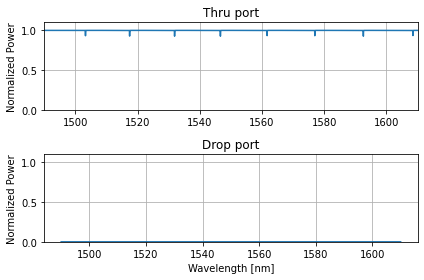

In [3]:
# All-pass microring resonator 

wavelengths = np.arange(1490, 1610, 0.01) * (10 ** -9) 
ring_type = 'All-pass'
radius = 10 * (10 ** -6)
coupling_length = 0
kappa = 0.1
tau = np.sqrt(1-(kappa ** 2))
n_eff = 2.56
ng = 2.7
losses = 0.3


all_pass_ring = ring_resonator(wavelengths, ring_type, radius, coupling_length, kappa, tau, n_eff, ng, losses)

fig, axs = plt.subplots(2, 1)
axs[0].plot(wavelengths * (10 ** 9), abs(all_pass_ring['E_thru'])**2)
axs[0].set_ylim(0, 1.1)
axs[0].set_xlim(1490, 1610)
axs[0].set_ylabel('Normalized Power')
axs[0].grid(True)
axs[0].set_title('Thru port')

axs[1].plot(wavelengths * (10 ** 9), abs(all_pass_ring['E_drop'])**2)
axs[1].set_ylim(0, 1.1)
axs[0].set_xlim(1490, 1610)
axs[1].set_xlabel('Wavelength [nm]')
axs[1].set_ylabel('Normalized Power')
axs[1].grid(True)
axs[1].set_title('Drop port')

fig.tight_layout()
plt.show()


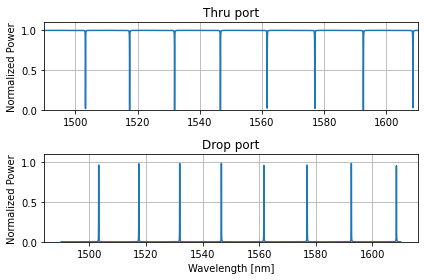

In [4]:
# Add-drop microring resonator 

wavelengths = np.arange(1490, 1610, 0.01) * (10 ** -9)
ring_type = 'Add-drop'
radius = 10 * (10 ** -6)
coupling_length = 0
kappa = 0.1
tau = np.sqrt(1-(kappa ** 2))
n_eff = 2.56
ng = 2.7
losses = 0.3

add_drop_ring = ring_resonator(wavelengths, ring_type, radius, coupling_length, kappa, tau, n_eff, ng, losses)


fig, axs = plt.subplots(2, 1)
axs[0].plot(wavelengths * (10 ** 9), abs(add_drop_ring['E_thru'])**2)
axs[0].set_ylim(0, 1.1)
axs[0].set_xlim(1490, 1610)
axs[0].set_ylabel('Normalized Power')
axs[0].grid(True)
axs[0].set_title('Thru port')

axs[1].plot(wavelengths * (10 ** 9), abs(add_drop_ring['E_drop'])**2)
axs[1].set_ylim(0, 1.1)
axs[0].set_xlim(1490, 1610)
axs[1].set_xlabel('Wavelength [nm]')
axs[1].set_ylabel('Normalized Power')
axs[1].grid(True)
axs[1].set_title('Drop port')

fig.tight_layout()
plt.show()
